In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
np.random.seed(0)
n = 10

X = np.linspace(0, 1, n)[:, np.newaxis]
Y = np.sin(np.pi * X) + 0.1 * np.random.normal(size=n)[:, np.newaxis]

In [167]:
class LinearRegression():
    def __init__(self, degree = 1):
        self.degree = degree

        self.w = np.zeros(self.degree)
        self.b = 0

        self.model = lambda x: self.w.dot(self._preprocess(x)) + self.b

    def __call__(self, x):
        return self.model(x)

    def train(self, X, Y, epoch = 10, learning_rate = 0.01, lasso = 0, ridge = 0):
        m = len(X)

        costs = []

        for _ in range(epoch):
            cost = 0

            for index in range(m):
                x, y = X.item(index), Y.item(index)

                preprocessed_x = self._preprocess(x)

                prediction = self.model(x)

                error = prediction - y

                loss = (error ** 2) / 2

                l1 = ((lasso / 2 * m) * abs(self.w).sum())

                l2 = ((ridge / 2 * m) * (self.w ** 2).sum())

                cost += loss + l1 + l2

                w_update = self.w - (learning_rate * ((error * preprocessed_x) + ((ridge * self.w) / m) + (lasso / (2 * m))))

                b_update = self.b - (learning_rate * error)

                self.w = w_update

                self.b = b_update

            costs.append(cost / m)

        return costs

    def _preprocess(self, x):
        return np.array([x ** i for i in range(1, self.degree + 1)])

In [164]:
model = LinearRegression(9)
costs = model.train(X, Y, 60, 0.01)

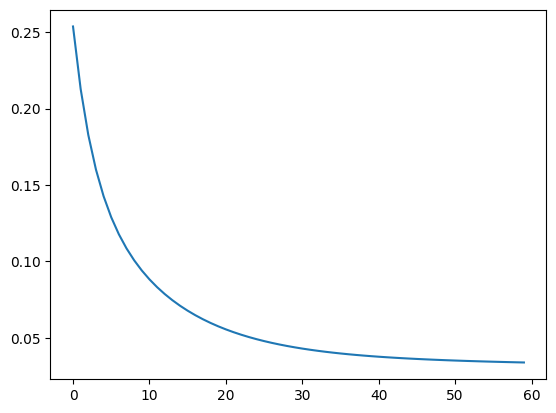

In [165]:
plt.plot(costs)
plt.show()

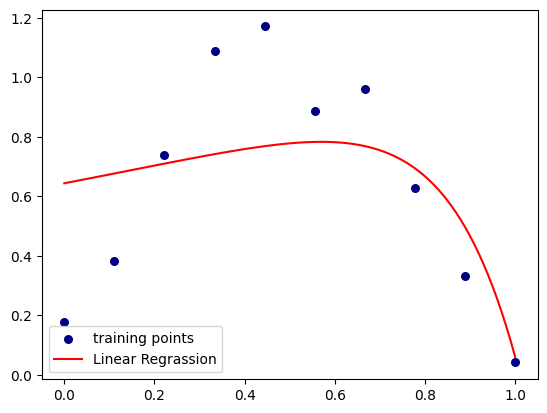

In [166]:
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]

Y_plot = np.array(list(map(model, X_plot)))

plt.scatter(X, Y, color='navy', s=30, marker='o', label="training points")
plt.plot(X_plot, Y_plot, color='red', label="Linear Regrassion")
plt.legend(loc='lower left')
plt.show()